In [1]:
%matplotlib inline
import zs, pdb, os, codecs, time, math, numpy as np, pandas as pd
import scipy.stats
import rpy2.robjects.lib.ggplot2 as ggplot2
%load_ext rpy2.ipython
import bootstrap_sample
import config

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.1.0 but you have 3.3.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


# Google 1T

Attempted to parallelize -- very hard because of the huge ZS object
https://stackoverflow.com/questions/11951750/sharing-object-class-instance-in-python-using-managers

In [50]:
#What is the falloff from English 1T to a 1T sized other corpus (here, Swedish-sized)
sampleSizes = np.array([16238032967])

In [53]:
reload(bootstrap_sample)
g1t_small = bootstrap_sample.getSampledSurprisalEstimates(config.paths['current_unfiltered'],'Google1T', 'ENGLISH', sampleSizes, intermediateSampleSize=None, numSamples=10)

Loading surprisal estimates for ENGLISH, Google1T
Loading backwards-indexed counts
Loading forwards-indexed counts
Done loading datasets!
get_trigram_surprisals_for_word elapsed:

bootstrap_sample.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_nonzero['probContinuation'] = df_nonzero['trigramCount'] / df_nonzero['bigramCount']
bootstrap_sample.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_nonzero['newContinuationCount'] = [np.random.binomial(n=df_nonzero['newContextCount'].values[i], p= df_nonzero['probContinuation'].values[i]) for i in range(df_nonzero.shape[0])]



39.5901918411
get_trigram_surprisals_for_word elapsed:
1.41646409035
get_trigram_surprisals_for_word elapsed:
1.23789191246
get_trigram_surprisals_for_word elapsed:
0.841541051865
get_trigram_surprisals_for_word elapsed:
0.709406852722
get_trigram_surprisals_for_word elapsed:
0.785783052444
get_trigram_surprisals_for_word elapsed:
0.406950950623
get_trigram_surprisals_for_word elapsed:
0.74493098259
get_trigram_surprisals_for_word elapsed:
0.64155292511
get_trigram_surprisals_for_word elapsed:
0.270109891891
get_trigram_surprisals_for_word elapsed:
0.652029037476
get_trigram_surprisals_for_word elapsed:
0.236393928528
get_trigram_surprisals_for_word elapsed:
0.23446393013
get_trigram_surprisals_for_word elapsed:
0.966100931168
get_trigram_surprisals_for_word elapsed:
0.217190027237
get_trigram_surprisals_for_word elapsed:
0.267984867096
get_trigram_surprisals_for_word elapsed:
0.283932924271
get_trigram_surprisals_for_word elapsed:
0.167674064636
get_trigram_surprisals_for_word elapse

In [54]:
g1t_small

,boot_frequency,mean_info_content,num_boot_contexts,sample_index,propOfOriginalCorpus,sampleSize,usesIntermediateSampleSize,word,mean_surprisal_weighted,mean_surprisal_unweighted,frequency,numContexts,retrievalTime,dataset,language
0,832472561,1.504973,5397747,0,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
1,832410796,1.505051,5397919,1,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
2,832475269,1.505004,5398039,2,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
3,832434257,1.505047,5397296,3,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
4,832515880,1.504966,5397750,4,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
5,832421482,1.505040,5397009,5,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
6,832507478,1.504968,5397503,6,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
7,832518495,1.504980,5397786,7,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
8,832459767,1.505055,5396688,8,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH
9,832412557,1.504967,5397632,9,0.053402,16238032967,False,the,1.506892,1.554092,15588550890,5530253,27.923640,Google1T,ENGLISH


In [55]:
%R -i g1t_small

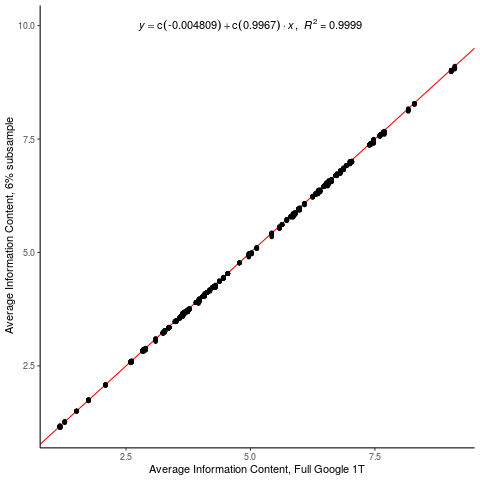

In [56]:
%%R
m = lm(mean_info_content ~ mean_surprisal_weighted, g1t_small)

eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(R)^2~"="~r2,
list( a = format(coef(m)[1], digits = 4),
    b = format(coef(m)[2], digits = 4),
    r2 = format(summary(m)$r.squared, digits = 4)))

r2 <- data.frame(x = 5, y = 10, eq = as.character(as.expression(eq))) 

p1 = ggplot(g1t_small) + geom_abline(yintercept=0, slope=1, colour = 'red') + geom_point(aes(
x=mean_surprisal_weighted, y=mean_info_content)) + theme_classic(
) + xlab('Average Information Content, Full Google 1T') + ylab(
' Average Information Content, 6% subsample') + geom_text(aes(x=x, y=y, label = eq), 
    data = r2, parse = TRUE)

ggsave('pdfs/g1t_6percent_subsample_AvgInfoContent.pdf', width=4, height=4)
print(p1)

For English, a decrease of this magnitude has minimal effects on the average information content estimates. But does this hold in other languages?

# Estimate falloff from 16B 

In [26]:
# Look at the falloff wrt a 17b word corpus 
#languages = ['FRENCH',SPANISH','ITALIAN','PORTUGUESE','GERMAN','CZECH','POLISH','ROMANIAN','DUTCH','SWEDISH']
languages = ['FRENCH']
smallest_corp = 16 * 10**9  # this is the size of smallest preprocessed corpus (Swedish)
sampleSizes = 10**9 * np.arange(2,float(smallest_corp / 10**9)+2,2)
sampleSizes
#

array([2.0e+09, 4.0e+09, 6.0e+09, 8.0e+09, 1.0e+10, 1.2e+10, 1.4e+10,
       1.6e+10])

In [5]:
config.paths['current_unfiltered']

'/shared_hd1/models/ss/25Feb_rerun_noFilter/'

In [27]:
languages

['FRENCH']

In [28]:
reload(bootstrap_sample)
# this takes several hours2
results_french = [bootstrap_sample.getSampledSurprisalEstimates(config.paths['current_unfiltered'],'Google1T', language, sampleSizes,
    intermediateSampleSize=16*(10**9), numSamples=10) for language in languages]
# restricted for testing: languages restricted to 1, choose 10 sample words, 10 samples per language

Loading surprisal estimates for FRENCH, Google1T
Loading backwards-indexed counts
Loading forwards-indexed counts
Done loading datasets!
get_trigram_surprisals_for_word elapsed:
11.749297142
get_trigram_surprisals_for_word elapsed:
7.38061404228
get_trigram_surprisals_for_word elapsed:
7.32313609123
get_trigram_surprisals_for_word elapsed:
7.48521184921
get_trigram_surprisals_for_word elapsed:
7.66287994385
get_trigram_surprisals_for_word elapsed:
7.93393492699
get_trigram_surprisals_for_word elapsed:
7.81929206848
get_trigram_surprisals_for_word elapsed:
7.73906612396
get_trigram_surprisals_for_word elapsed:
0.864161014557
get_trigram_surprisals_for_word elapsed:
0.112847089767
get_trigram_surprisals_for_word elapsed:
0.101026058197
get_trigram_surprisals_for_word elapsed:
0.100692033768
get_trigram_surprisals_for_word elapsed:
0.100120067596
get_trigram_surprisals_for_word elapsed:
0.098956823349
get_trigram_surprisals_for_word elapsed:
0.1447660923
get_trigram_surprisals_for_word el

get_trigram_surprisals_for_word elapsed:
0.0281689167023
get_trigram_surprisals_for_word elapsed:
0.0217230319977
get_trigram_surprisals_for_word elapsed:
0.110029935837
get_trigram_surprisals_for_word elapsed:
0.0387279987335
get_trigram_surprisals_for_word elapsed:
0.041384935379
get_trigram_surprisals_for_word elapsed:
0.0298519134521
get_trigram_surprisals_for_word elapsed:
0.0272190570831
get_trigram_surprisals_for_word elapsed:
0.0307619571686
get_trigram_surprisals_for_word elapsed:
0.0414531230927
get_trigram_surprisals_for_word elapsed:
0.0307941436768
get_trigram_surprisals_for_word elapsed:
0.497802019119
get_trigram_surprisals_for_word elapsed:
0.0204131603241
get_trigram_surprisals_for_word elapsed:
0.020327091217
get_trigram_surprisals_for_word elapsed:
0.0209591388702
get_trigram_surprisals_for_word elapsed:
0.0261018276215
get_trigram_surprisals_for_word elapsed:
0.0208609104156
get_trigram_surprisals_for_word elapsed:
0.0207660198212
get_trigram_surprisals_for_word ela

get_trigram_surprisals_for_word elapsed:
0.0246510505676
get_trigram_surprisals_for_word elapsed:
0.0254969596863
get_trigram_surprisals_for_word elapsed:
0.0239868164062
get_trigram_surprisals_for_word elapsed:
0.0257639884949
get_trigram_surprisals_for_word elapsed:
0.0248510837555
get_trigram_surprisals_for_word elapsed:
0.0253009796143
get_trigram_surprisals_for_word elapsed:
0.0211341381073
get_trigram_surprisals_for_word elapsed:
0.0245208740234
get_trigram_surprisals_for_word elapsed:
0.0300550460815
get_trigram_surprisals_for_word elapsed:
0.0195639133453
get_trigram_surprisals_for_word elapsed:
0.47275185585
get_trigram_surprisals_for_word elapsed:
0.0197558403015
get_trigram_surprisals_for_word elapsed:
0.0207200050354
get_trigram_surprisals_for_word elapsed:
0.0211079120636
get_trigram_surprisals_for_word elapsed:
0.0211248397827
get_trigram_surprisals_for_word elapsed:
0.0240058898926
get_trigram_surprisals_for_word elapsed:
0.0240859985352
get_trigram_surprisals_for_word e

get_trigram_surprisals_for_word elapsed:
0.0226171016693
get_trigram_surprisals_for_word elapsed:
0.0231258869171
get_trigram_surprisals_for_word elapsed:
0.0435950756073
get_trigram_surprisals_for_word elapsed:
0.0193948745728
get_trigram_surprisals_for_word elapsed:
0.0220789909363
get_trigram_surprisals_for_word elapsed:
0.0220890045166
get_trigram_surprisals_for_word elapsed:
0.0246849060059
get_trigram_surprisals_for_word elapsed:
0.0232059955597
get_trigram_surprisals_for_word elapsed:
0.0261061191559
get_trigram_surprisals_for_word elapsed:
0.0228328704834
get_trigram_surprisals_for_word elapsed:
0.0843050479889
get_trigram_surprisals_for_word elapsed:
0.0226058959961
get_trigram_surprisals_for_word elapsed:
0.0173981189728
get_trigram_surprisals_for_word elapsed:
0.0184261798859
get_trigram_surprisals_for_word elapsed:
0.0186388492584
get_trigram_surprisals_for_word elapsed:
0.0226409435272
get_trigram_surprisals_for_word elapsed:
0.0177540779114
get_trigram_surprisals_for_word

get_trigram_surprisals_for_word elapsed:
0.0193009376526
get_trigram_surprisals_for_word elapsed:
0.0192840099335
get_trigram_surprisals_for_word elapsed:
0.0800831317902
get_trigram_surprisals_for_word elapsed:
0.0206401348114
get_trigram_surprisals_for_word elapsed:
0.0222489833832
get_trigram_surprisals_for_word elapsed:
0.0202770233154
get_trigram_surprisals_for_word elapsed:
0.0196981430054
get_trigram_surprisals_for_word elapsed:
0.0173921585083
get_trigram_surprisals_for_word elapsed:
0.019809961319
get_trigram_surprisals_for_word elapsed:
0.0203008651733
get_trigram_surprisals_for_word elapsed:
0.0197350978851
get_trigram_surprisals_for_word elapsed:
0.0201349258423
get_trigram_surprisals_for_word elapsed:
0.0235311985016
get_trigram_surprisals_for_word elapsed:
0.0226259231567
get_trigram_surprisals_for_word elapsed:
0.0185580253601
get_trigram_surprisals_for_word elapsed:
0.0182631015778
get_trigram_surprisals_for_word elapsed:
0.0193951129913
get_trigram_surprisals_for_word 

get_trigram_surprisals_for_word elapsed:
0.0214068889618
get_trigram_surprisals_for_word elapsed:
0.0221560001373
get_trigram_surprisals_for_word elapsed:
0.0717301368713
get_trigram_surprisals_for_word elapsed:
0.0211660861969
get_trigram_surprisals_for_word elapsed:
0.0214760303497
get_trigram_surprisals_for_word elapsed:
0.0225479602814
get_trigram_surprisals_for_word elapsed:
0.0172619819641
get_trigram_surprisals_for_word elapsed:
0.0175361633301
get_trigram_surprisals_for_word elapsed:
0.0160450935364
get_trigram_surprisals_for_word elapsed:
0.0176470279694
get_trigram_surprisals_for_word elapsed:
0.0807468891144
get_trigram_surprisals_for_word elapsed:
0.0190739631653
get_trigram_surprisals_for_word elapsed:
0.0198659896851
get_trigram_surprisals_for_word elapsed:
0.0193109512329
get_trigram_surprisals_for_word elapsed:
0.0211000442505
get_trigram_surprisals_for_word elapsed:
0.0186228752136
get_trigram_surprisals_for_word elapsed:
0.0201799869537
get_trigram_surprisals_for_word

In [12]:
falloff = pd.concat(results)

In [13]:
falloff.to_csv('csv/falloff.csv', index=False, encoding ='utf-8')

In [38]:
falloff_french =  pd.concat(results_french)
falloff_french.to_csv('csv/falloff_french.csv', index=False, encoding ='utf-8')
falloff = pd.concat([falloff_french, falloff])

In [39]:
falloff.shape

(80000, 16)

In [40]:
# falloff = pd.concat([
#     pd.read_csv('csv/falloff_16b_v3_french.csv'),
#     pd.read_csv('csv/falloff_16b_v3.csv')
# ])
%R -i falloff
%R names(falloff)

array(['boot_frequency', 'mean_info_content', 'num_boot_contexts',
       'sample_index', 'propOfIntermediateCorpus', 'propOfOriginalCorpus',
       'sampleSize', 'usesIntermediateSampleSize', 'word',
       'mean_surprisal_weighted', 'mean_surprisal_unweighted',
       'frequency', 'numContexts', 'retrievalTime', 'dataset', 'language'],
      dtype='|S26')

In [42]:
falloff.tail(10)

,boot_frequency,mean_info_content,num_boot_contexts,sample_index,propOfIntermediateCorpus,propOfOriginalCorpus,sampleSize,usesIntermediateSampleSize,word,mean_surprisal_weighted,mean_surprisal_unweighted,frequency,numContexts,retrievalTime,dataset,language
7990,33317,2.847326,19,0,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7991,33324,2.852031,19,1,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7992,33321,2.852205,19,2,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7993,33754,2.844064,19,3,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7994,33771,2.836161,19,4,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7995,33308,2.850231,19,5,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7996,33207,2.861415,19,6,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7997,33557,2.853679,19,7,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7998,33339,2.841271,19,8,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH
7999,33124,2.847076,19,9,1.0,0.544479,1.600000e+10,True,bildspelen,2.856273,7.274197,61089,19,0.004526,Google1T,SWEDISH


In [43]:
%%R
falloff_top

       language               word aic_intermediate
6301 PORTUGUESE                  ┐     4.2252258459
6302    ITALIAN                  ♪     1.7215106542
6303 PORTUGUESE                  ˆ     2.3994936065
6304 PORTUGUESE                  ‹     2.1634831780
6305   ROMANIAN          100502515     1.4837816344
6306    SWEDISH                107     4.0287163640
6307    ITALIAN               1080     1.6028923922
6308    SPANISH                159     6.3645952674
6309      DUTCH               1732     2.3780338925
6310   ROMANIAN               1904     1.4305548365
6311 PORTUGUESE               1923     1.1021950649
6312     GERMAN               1948     2.2312964667
6313 PORTUGUESE                200     4.4132619139
6314     POLISH               2800     2.3581865063
6315      DUTCH                37m     4.0880844513
6316      DUTCH               4562     0.0734278334
6317      CZECH              50000     1.1086308692
6318    ITALIAN                5th     2.2949020783
6319     GER

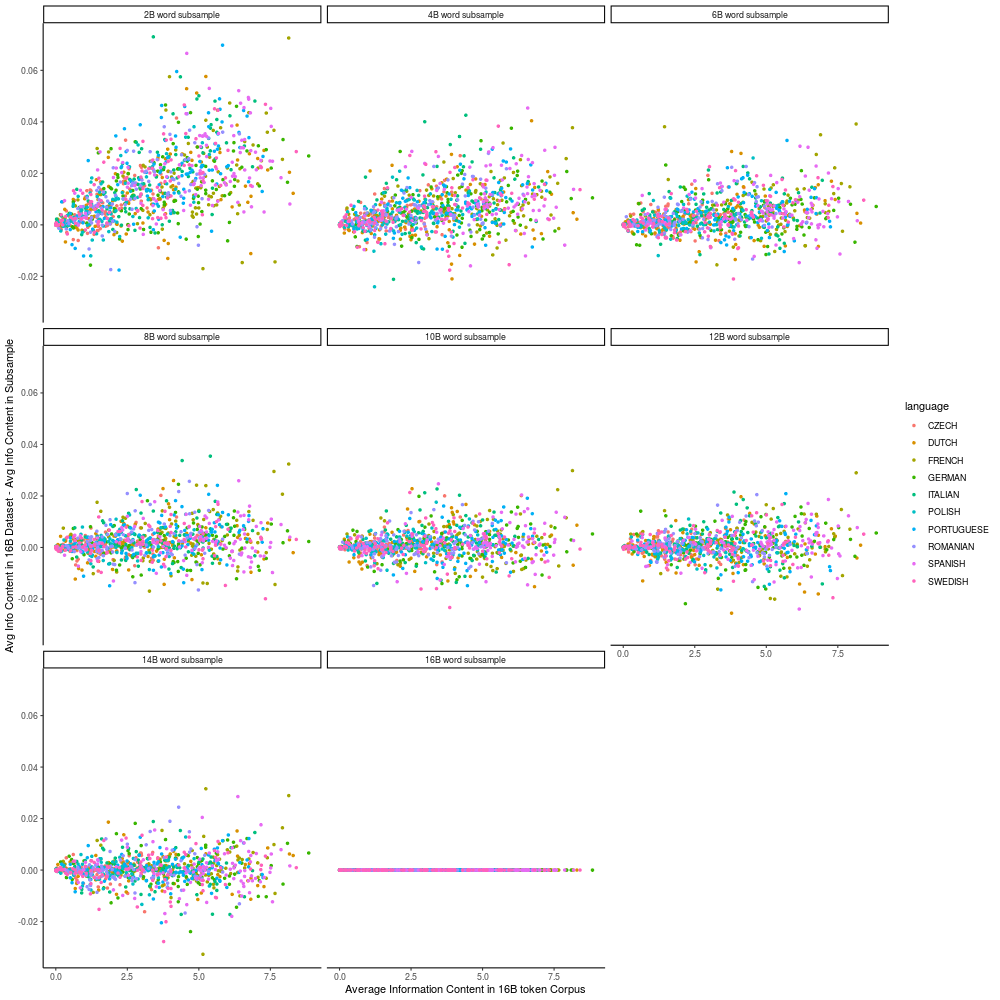

In [44]:
%%R -w 1000 -h 1000
# take the means
falloff_means = aggregate(mean_info_content ~ language + word + propOfIntermediateCorpus , falloff, mean)
falloff_top = subset(falloff_means, propOfIntermediateCorpus == 1)
falloff_top$propOfIntermediateCorpus = NULL
names(falloff_top) = c('language', 'word','aic_intermediate')
falloff_merged = merge(falloff_means, falloff_top, by=c('language',
    'word'), all.x=T)
falloff_merged$diff = falloff_merged$aic_intermediate - falloff_merged$mean_info_content
falloff_merged[1:10,]
falloff_merged$corpus_size = 16*falloff_merged$propOfIntermediateCorpus
falloff_merged$corpus_size_text = paste(16*falloff_merged$propOfIntermediateCorpus,'B word subsample', sep='')
corpus_size_levels = paste(seq(2,16,2), 'B word subsample', sep='')
falloff_merged$corpus_size_text = factor(falloff_merged$corpus_size_text, levels = corpus_size_levels)

p1 = ggplot(falloff_merged) + geom_point(aes(x=aic_intermediate, y = diff,
    colour=language), size=1) + theme_classic() + facet_wrap(~corpus_size_text
    ) + xlab('Average Information Content in 16B token Corpus') + ylab(
    'Avg Info Content in 16B Dataset - Avg Info Content in Subsample')
print(p1)
#ggsave('pdfs/16B_falloff.pdf', height=6, width=6)
# #take wrt intermediate

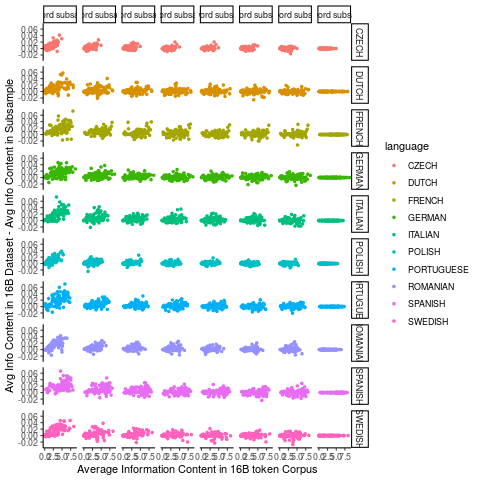

In [45]:
%%R
p1 = ggplot(subset(falloff_merged, language != 'ENGLISH')) + geom_point(aes(x=aic_intermediate, y = diff,
    colour=language), size=1) + theme_classic() + facet_grid(language~corpus_size_text
    ) + xlab('Average Information Content in 16B token Corpus') + ylab(
    'Avg Info Content in 16B Dataset - Avg Info Content in Subsample')
print(p1)

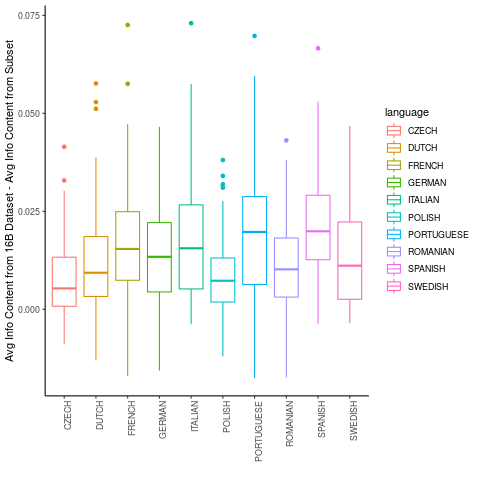

In [46]:
%%R
p1 = ggplot(subset(falloff_merged, language != 'ENGLISH' & corpus_size_text == '2B word subsample')) + geom_boxplot(aes(y = diff,
    x=language, colour=language)) + theme_classic() + theme(axis.text.x = element_text(angle = 90,
hjust = 1)) +  xlab('') + ylab(
'Avg Info Content from 16B Dataset - Avg Info Content from Subset')
print(p1)

In [47]:
%%R
names(falloff_merged)

[1] "language"                 "word"                    
[3] "propOfIntermediateCorpus" "mean_info_content"       
[5] "aic_intermediate"         "diff"                    
[7] "corpus_size"              "corpus_size_text"        


In [48]:
%%R
fm_subset = subset(falloff_merged, language != 'ENGLISH' )
anova(lm(diff ~ language * corpus_size, fm_subset))

Analysis of Variance Table

Response: diff
                       Df  Sum Sq  Mean Sq  F value    Pr(>F)    
language                9 0.01121 0.001245   21.651 < 2.2e-16 ***
corpus_size             1 0.11186 0.111864 1945.200 < 2.2e-16 ***
language:corpus_size    9 0.01053 0.001170   20.337 < 2.2e-16 ***
Residuals            7980 0.45891 0.000058                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


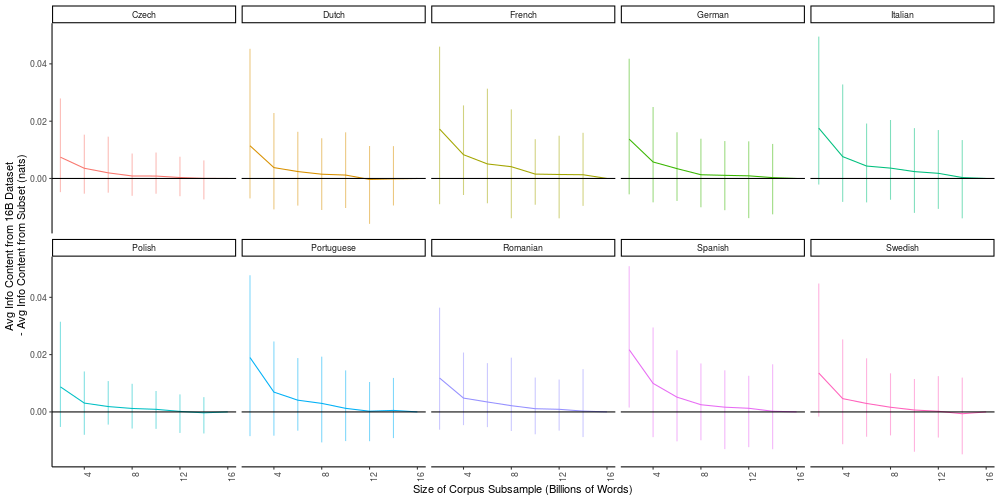

In [49]:
%%R -h 500 -w 1000 

simpleCap <- function(x) {
  s <- strsplit(x, " ")[[1]]
  paste(toupper(substring(s, 1,1)), tolower(substring(s, 2)),
      sep="", collapse=" ")
}

falloff_merged_agg = do.call(data.frame, aggregate(diff ~ language + corpus_size, falloff_merged, 
    FUN = function(x) c(mn = mean(x), high = quantile(x,.975), low = quantile(x,.025))))

names(falloff_merged_agg) = c('language','corpus_size','mean','high','low')
falloff_merged_agg$language = sapply(as.character(falloff_merged_agg$language), simpleCap)

p1 = ggplot(subset(falloff_merged_agg, language != 'English'
))  + geom_path(aes(y = mean, x= corpus_size, colour=language))+ theme_classic(
) + theme(axis.text.x = element_text(angle = 90,
 hjust = 1)) +  xlab('') + ylab(
'Avg Info Content from 16B Dataset \n- Avg Info Content from Subset (nats)'
) + facet_wrap(~language, nrow=2) + geom_linerange(data = subset(falloff_merged_agg, corpus_size < 16
& language != 'English'), aes(x=corpus_size, ymin=low, ymax=high,colour=language,), alpha=.5
) + xlab('Size of Corpus Subsample (Billions of Words)') + theme(legend.position="none"
) + geom_hline(yintercept=0)
                                                   
print(p1)
ggsave('pdfs/16B_falloff.pdf', width =6, height=3)